# Esame Laboratorio di Programmazione II - 27/06/2025


## Esercizio 1

Crea un array NumPy con i prezzi (in euro) di 5 libri: **14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30**

1. Calcola il prezzo medio dei libri
2. Seleziona i libri con un prezzo maggiore della media.
3. Crea un nuovo array che applica uno sconto del 10% solo ai libri che costano più della media.

In [ ]:
import numpy as np
# Correct array of book prices from the exercise
vet = np.array([14.99, 22.50, 9.75, 18.00, 31.20, 12.80, 24.90, 8.40, 19.99, 27.30])
mean = np.mean(vet)
print("Média:", mean)

# 1. Calculate the average price of books
print("1. Prezzo medio:", mean)

# 2. Select books with a price higher than average
vet2 = vet[vet > mean]
print("2. Libri con prezzo maggiore della media:", vet2)

# 3. Create a new array with 10% discount for books that cost more than average
vet3 = vet.copy()
vet3[vet > mean] = vet3[vet > mean] * 0.9
print("3. Libri con sconto del 10% sui prezzi superiori alla media:", vet3)

Média: 18.983000000000004
1. Prezzo medio: 18.983000000000004
2. Libri con prezzo maggiore della media: [22.5  31.2  24.9  19.99 27.3 ]
3. Libri con sconto del 10% sui prezzi superiori alla media: [14.99  20.25   9.75  18.    28.08  12.8   22.41   8.4   17.991 24.57 ]


## Esercizio 2

Simula 1000 lanci di una moneta che ad ogni lancio ha il doppio di probabilità di risultare croce invece che testa. Ogni lancio è rappresentato da 1 (testa) o 0 (croce).

1. Crea un array NumPy contenente i risultati.
2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
3. Crea un grafico della proporzione cumulativa nel tempo (dopo 50 lanci, dopo 100, dopo 150,...).

Proporzioni ogni 50 lanci: [0.24       0.29       0.31333333 0.36       0.364      0.34333333
 0.36       0.365      0.36666667 0.346      0.35272727 0.34833333
 0.34153846 0.33714286 0.336      0.3325     0.33294118 0.33888889
 0.34       0.341     ]


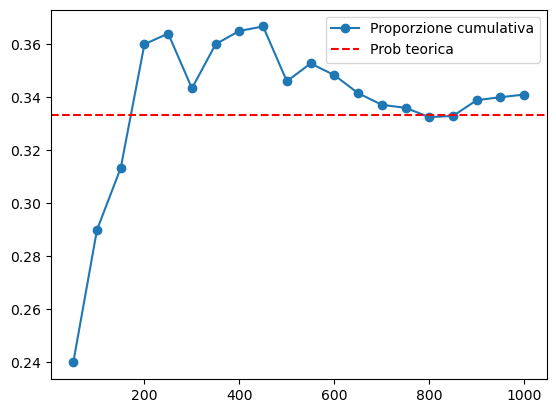

(<matplotlib.legend.Legend at 0x18df7677390>, None)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

nLanci = 1000

lanci = np.random.choice([1, 0], size=nLanci, p=[1/3, 2/3])

#2. Calcola la proporzione di teste dopo ogni 50 lanci cumulativi.
# Calcola la somma cumulativa delle teste
cumsum_teste = np.cumsum(lanci)

# Indici multipli di 50
punti = np.arange(50, nLanci+1, 50)

# Proporzione cumulativa
proporzione = cumsum_teste[punti - 1] / punti

print("Proporzioni ogni 50 lanci:", proporzione)



plt.plot(punti, proporzione, 'o-', label='Proporzione cumulativa')   # 'o-' = line + marker
plt.axhline(1/3, color='r', linestyle='--', label='Prob teorica')
plt.legend(), plt.show()






## Esercizio 3

Crea una funzione di nome **mat_normalizzata** che prende come input una matrice e ritorna la matrice normalizzata.

La funzione deve quindi:
1. Calcolare la media e la deviazione standard della matrice.
2. Normalizzare la matrice sottraendo la media e dividendo per la deviazione standard.

Testa La funzione con un array NumPy 6x10 con numeri campionati da una distribuzione normale (media=5, std=2).

In [ ]:
import numpy as np

# 1. Definisci la funzione
def mat_normalizzata(mat):
    mean = np.mean(mat)
    std = np.std(mat)
    mat_norm = (mat - mean) / std
    return mat_norm

# 2. Test
np.random.seed(42)  # per riproducibilità
mat = np.random.normal(5, 2, (6, 10))
print("Matrice originale:\n", mat)

mat_norm = mat_normalizzata(mat)
print("\nMatrice normalizzata:\n", mat_norm)

# 3. Verifica
print("\nMedia matrice normalizzata:", np.mean(mat_norm))
print("Deviazione standard matrice normalizzata:", np.std(mat_norm))


Matrice originale:
 [[5.99342831 4.7234714  6.29537708 8.04605971 4.53169325 4.53172609
  8.15842563 6.53486946 4.06105123 6.08512009]
 [4.07316461 4.06854049 5.48392454 1.17343951 1.55016433 3.87542494
  2.97433776 5.62849467 3.18395185 2.1753926 ]
 [7.93129754 4.5484474  5.13505641 2.15050363 3.91123455 5.22184518
  2.69801285 5.75139604 3.79872262 4.4166125 ]
 [3.79658678 8.70455637 4.97300555 2.88457814 6.64508982 2.5583127
  5.41772719 1.08065975 2.3436279  5.39372247]
 [6.47693316 5.34273656 4.76870344 4.39779261 2.04295602 3.56031158
  4.07872246 7.11424445 5.68723658 1.47391969]
 [5.64816794 4.22983544 3.646156   6.22335258 7.06199904 6.86256024
  3.32156495 4.38157525 5.66252686 6.95109025]]

Matrice normalizzata:
 [[ 0.72300544  0.01819297  0.89058378  1.86219387 -0.08824184 -0.08822362
   1.92455575  1.02349948 -0.34944312  0.7738934 ]
 [-0.34272032 -0.34528666  0.44023632 -1.95203667 -1.74295843 -0.45246372
  -0.95255745  0.52047119 -0.83622388 -1.39596345]
 [ 1.7985021  -0

## Esercizio 4

Utilizza il dataset `books.csv`.

1. **Crea una nuova colonna** chiamata `engagement_score`, definita come:

   $$
   \texttt{engagement\_score} = \texttt{average\_rating} \times \log_{10}(1 + \texttt{ratings\_count})
   $$

   *(Un indicatore che tiene conto sia della qualità (valutazione media), sia della quantità di voti. Il logaritmo serve ad attenuare l'effetto dei libri estremamente popolari.)*

2. Trova il **libro con il valore massimo** di `engagement_score`.

3. **Filtra i libri** con una valutazione media (`average_rating`) **maggiore di 4.5**.

4. **Crea un grafico a barre** con i 10 libri con il valore più alto di `engagement_score`.

5. **Crea un grafico a linee** della `average_rating`, ordinando i libri per `ratings_count` crescente.


Libro con massimo engagement score:                                                title  engagement_score
1  Harry Potter and the Sorcerer's Stone (Harry P...         29.583684
Libri con average rating maggiore di 4.5:
 3096
Top 10 libri per engagement score:
                                                 title  engagement_score
1   Harry Potter and the Sorcerer's Stone (Harry P...         29.583684
0             The Hunger Games (The Hunger Games, #1)         28.988975
24  Harry Potter and the Deathly Hallows (Harry Po...         28.776483
17  Harry Potter and the Prisoner of Azkaban (Harr...         28.371937
23  Harry Potter and the Goblet of Fire (Harry Pot...         28.284381
26  Harry Potter and the Half-Blood Prince (Harry ...         28.261523
20  Harry Potter and the Order of the Phoenix (Har...         27.827688
3                               To Kill a Mockingbird         27.646121
30                                           The Help         27.524091
22  Harry Potter a

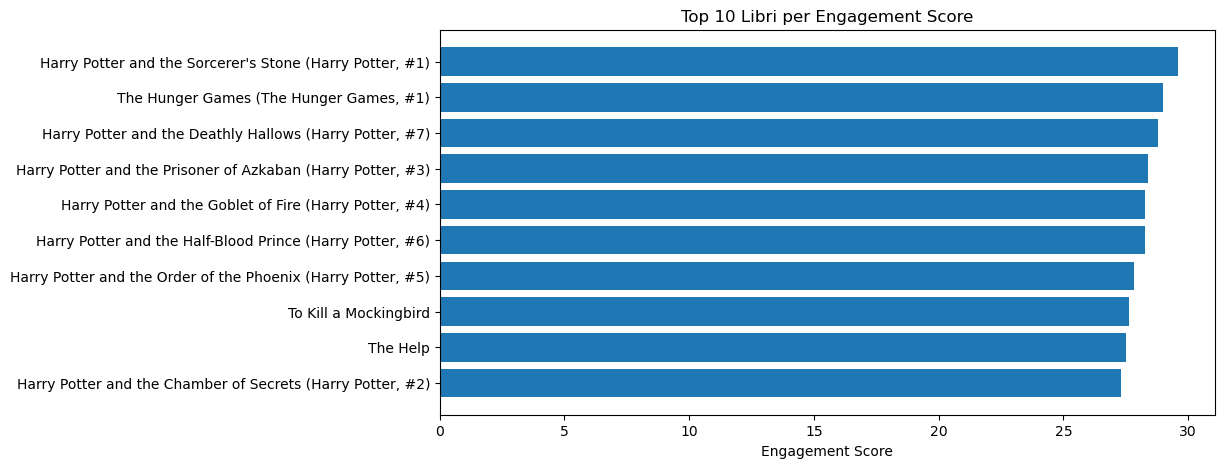

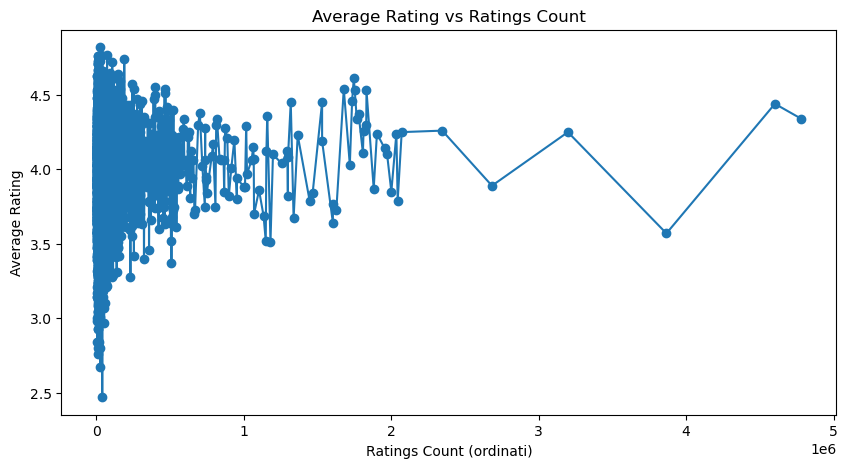

In [22]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("books.csv")
#print(df.head())


#nuova colonna
df['engagement_score'] = df['average_rating'] * np.log10(df['ratings_count'] + 1)
#print(df[['average_rating', 'ratings_count', 'engagement_score']].head())


#libro con massim o engagement score
max_engagement = df['engagement_score'].max()
mack_engagement_book = df[df['engagement_score'] == max_engagement]
print("Libro con massimo engagement score:", mack_engagement_book[['title', 'engagement_score']])

#filtro libri avarage rating maggiroe 4.5

filtered_books = df[df['average_rating'] > 4.5]
print("Libri con average rating maggiore di 4.5:\n", filtered_books.size)


#10 libri engagment score
top_books = df.nlargest(10, 'engagement_score')
print("Top 10 libri per engagement score:\n", top_books[['title', 'engagement_score']])
plt.figure(figsize=(10, 5))
plt.barh(top_books['title'], top_books['engagement_score'])
plt.xlabel('Engagement Score')
plt.title('Top 10 Libri per Engagement Score')
plt.gca().invert_yaxis()  # Per avere il più alto in alto
plt.show()

#Grafico a linee: average_rating ordinato per ratings_count crescente
df_sorted = df.sort_values('ratings_count')
plt.figure(figsize=(10, 5))
plt.plot(df_sorted['ratings_count'], df_sorted['average_rating'], marker='o')
plt.xlabel('Ratings Count (ordinati)')
plt.ylabel('Average Rating')
plt.title('Average Rating vs Ratings Count')
plt.show()

## Esercizio 5
Utilizza il dataset `adult.csv`.
Contiene informazioni demografiche su adulti negli Stati Uniti. Le colonne rilevanti sono:
- `age`: età (integer)
- `workclass`, `education`, `marital-status`, `occupation`, `race`, `sex`
- `hours-per-week`: ore lavorate a settimana
- `income`: `>50K` o `<=50K` (target)

1. Quante **righe e colonne** ha il dataset?
2. Quanti **valori mancanti** ci sono per colonna?
3. **Sostituisci i valori mancanti** nelle colonne categoriche (workclass, occupation, native-country) con il valore più frequente (la moda).
4. Calcola l’**età media** (`age`) per sesso (`sex`)
5. Trova la % di persone che guadagnano **>50K** per sesso.
7. Crea una **colonna `age_group`** raggruppando le età in fasce: `'<30'`, `'30-50'`, `'>50'`.
8. **Crea**:
   - un grafico **a barre** con % di reddito `>50K` per fascia di età.
   - un **boxplot** delle ore lavorate (`hours-per-week`) per gruppo reddito (<=50, >50).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("adult_con_titoli.csv")
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'adult.csv'

## Esercizio 6

Genera due array:

`x = np.linspace(0, 5, 80)`  
`y = 2.5 * x + 1.2 + np.random.normal(0, 0.5, 80)`

1. Usa `scipy.optimize.curve_fit` per stimare i parametri della retta.
2. Plotta i punti originali e la retta ottenuta.
3. Calcola MAE e RMSE tra i valori reali e quelli stimati.